#**Project Title: Yes Bank Stock Closing Price Prediction - Supervised ML Regression**

#**Problem Description**

##Time Series forecasting & modeling plays an important role in data analysis. Time series analysis is a specialized branch of statistics used extensively in fields such as Econometrics & Operation Research.






##Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

#Understanding the Problem Statement
Here in this problem set first it’s important to establish what we’re aiming to solve. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance. Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

our focus will be on the technical analysis part. We’ll be using a dataset of Yes Bank Stock price for this particular project.

#**Data Description**



*   The dataset contains multiple variables - date, open, high, low and close.
*   The column date contains the month and the year of the price of the share.
*   The columns Open and Close represent the starting and final price at which the stock is traded in a particular month.
*   High and Low represent the maximum and minimum price of the share for the month.
*   The profit or loss calculation is usually determined by the closing price of a stock for the month, hence we will consider the closing price as the target variable.




 

 

 



**Importing important libraries**

In [5]:
#Importing all the required libraries and metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

**Mounting the drive and importing the dataset**

In [6]:
# Mounting the drive first

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Loading and reading the dataset

df = pd.read_csv('/content/drive/MyDrive/dataforassign/data_YesBank_StockPrices.csv')

In [8]:
#Also making multiple copies of dataset so to avoid any data losses
df1 = df.copy()
stock_data = df.copy()

#Exploratory Data Analysis

**Let us now view first few rows of the dataset**

In [9]:
#Checking the head and tail of the data
stock_data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [10]:
stock_data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


**Dataset Summary**

There are multiple variables in the dataset – **date, open, high, low, close**.

The columns **Open and Close** represent the **starting and final price** at which the stock is traded on a particular day.

**High and Low** represent the **maximum, minimum** of the share for the day.

In [11]:
#Checking the shape of the dataset
stock_data.shape

(185, 5)

So we have **185 rows** and **5 columns**

**Let us examine the dataset how actually it looks like**

In [12]:
#Checking the information about the types variables in the dataset about and null values.
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [13]:
stock_data.isna().sum() 

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

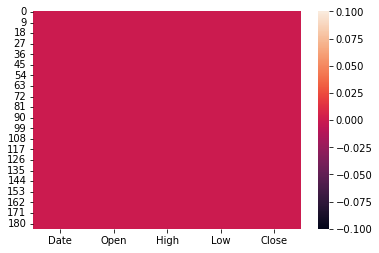

In [14]:
# to check null values by visualization method
sns.heatmap(stock_data.isnull(),cbar=True) 

We have 5 columns and 185 rows in the dataset and there are **no null values**.

In [15]:
#Description of the data 
stock_data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


**Let's check the linear relationship of open, high and low with our target variable Close.**

In [16]:
data3 = stock_data.drop(['Date'],axis=1)

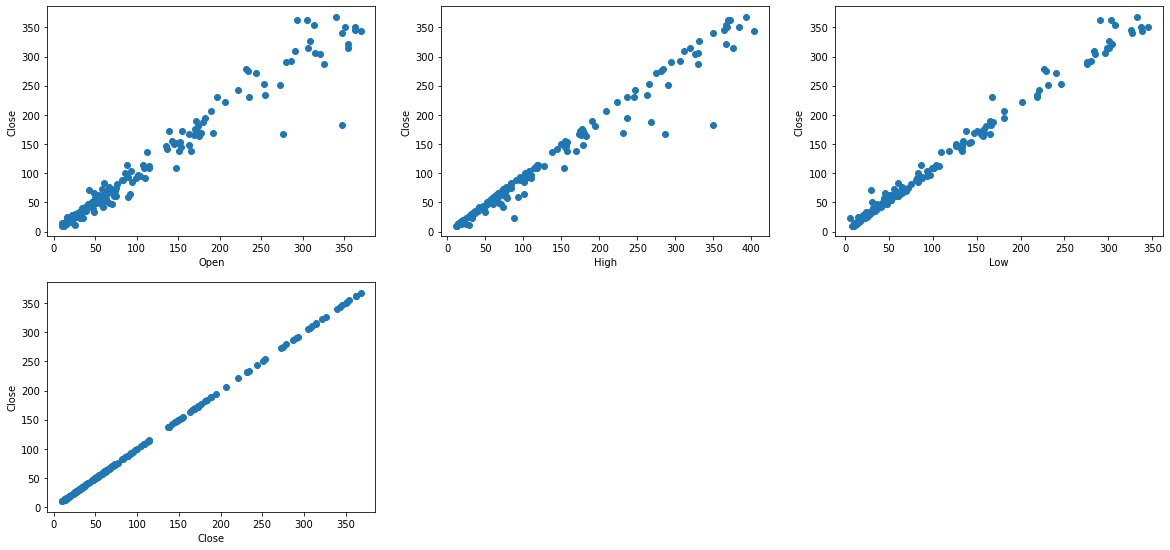

In [17]:
#Plotting the scatter plot
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in data3:
  ax = plt.subplot(12, 3, plotnumber)
  plt.scatter(data3[feature], data3['Close'])
  plt.xlabel(feature)
  plt.ylabel('Close')
  plotnumber+=1

plt.show()

It seems open, low and high are **linearly progressing** with Close.

##**Data Preprocessing**

**Let's first convert the Date into Datetime type from object type.**


In [18]:
stock_data['Date'][0:5]

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

In [19]:
from datetime import datetime
#Since the datatype of column 'Date' is object, we are converting it to datetime type.
from datetime import datetime
from datetime import date

stock_data['Date'] = stock_data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [20]:
#Checking once again first few rows of our dataset to ensure whether the date datatype is changed or not.
stock_data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [21]:
#Setting the column Date as the index
stock_data.set_index('Date',inplace=True)

**Now let us plot opening and closing stock prices with respect to year**

Text(0.5, 1.0, 'Closing price history')

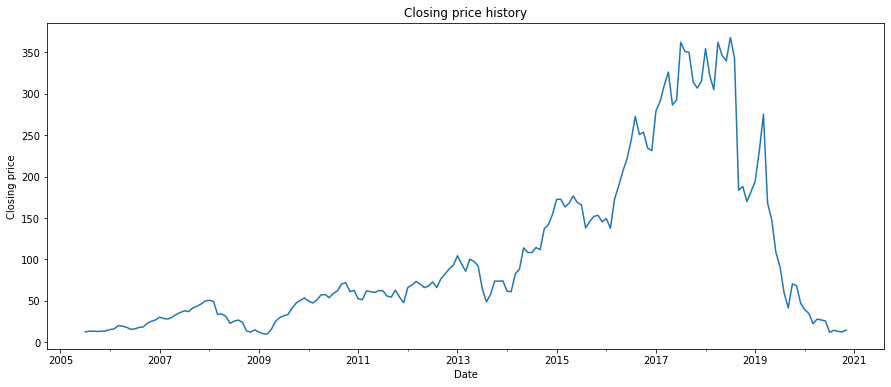

In [22]:
# plotting closing price history
ax = stock_data['Close'].plot(figsize=(15,6))
ax.autoscale()
plt.ylabel('Closing price')
plt.title('Closing price history')

Text(0.5, 1.0, 'Opening Price History')

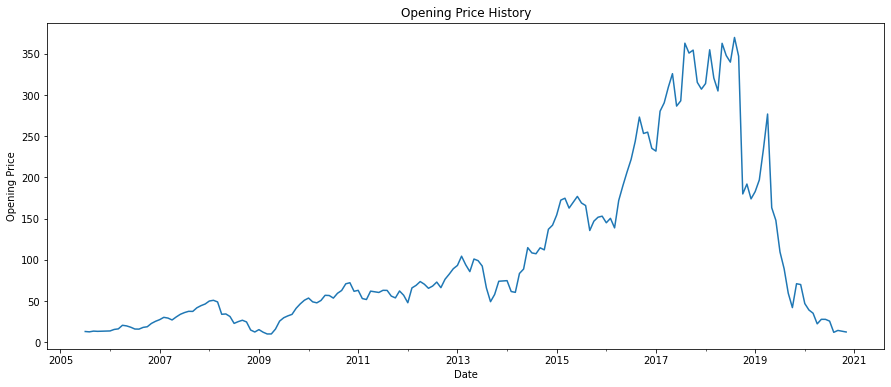

In [23]:
#Plotting opening price history
ax = stock_data['Open'].plot(figsize=(15,6))
ax.autoscale()
plt.ylabel('Opening Price')
plt.title('Opening Price History')

From the above plots we can see that the **opening and the closing** prices of the shares are **almost same**.

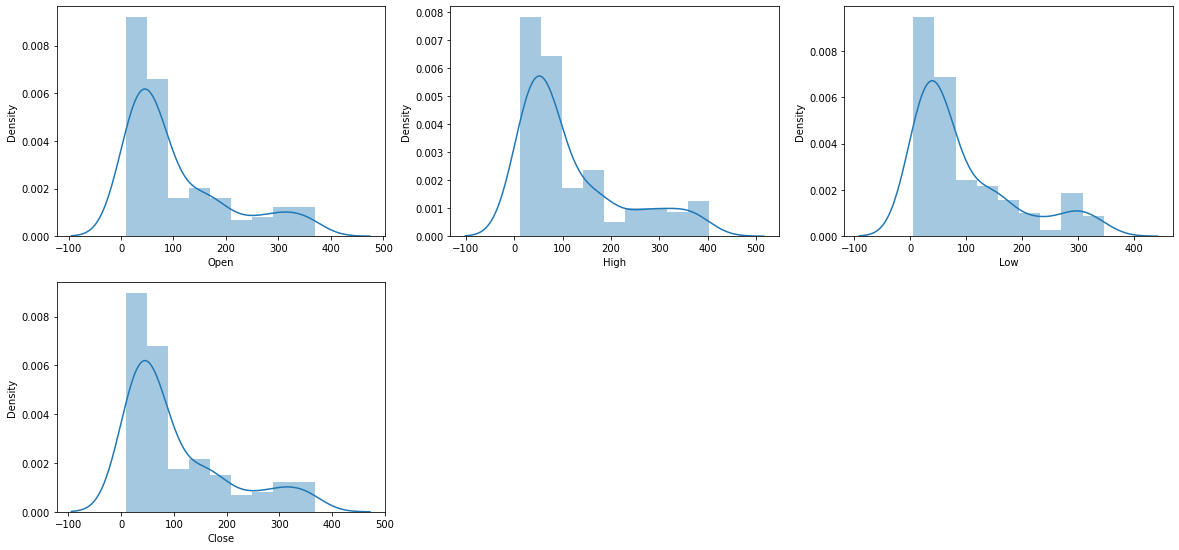

In [24]:
#Plotting distplots for all the columns
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in stock_data[1:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(stock_data[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

Our data seems to be positively skewed which means it needs normalization. We will do it after we create new features.

In [25]:
stock_data.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


Now let us plot the **regression line** for each columns of dataset with our target variable i.e, '**Close**'

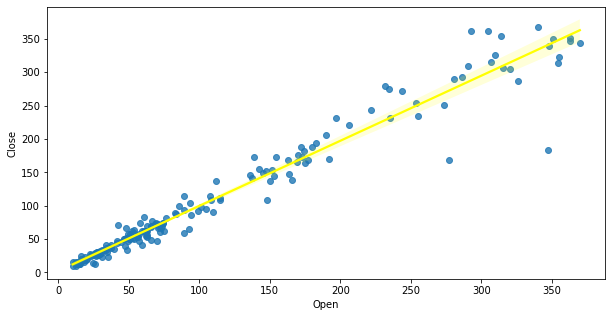

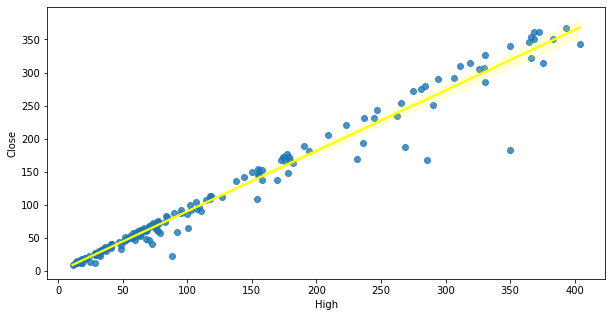

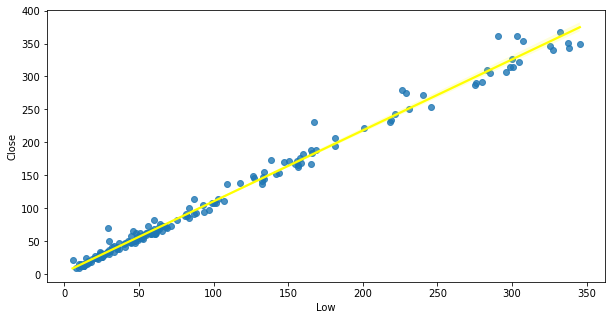

<Figure size 720x360 with 0 Axes>

In [26]:
# plotting Regression plot of each columns of dataset v/s  stock_data close column
for col in stock_data.columns.to_list()[:]:
  plt.figure(figsize=(10, 5))
  if col == 'Close':
    pass
  else:
    sns.regplot(x=stock_data[col],y=stock_data["Close"],line_kws={"color": "yellow"})
  
  plt.show()

We can clearly see that all the columns are **linear** with closing price.

In [27]:
#Creating a new dataframe with only date and close columns for sake of simplicity and further implementation.
stockdf = stock_data['Close'].reset_index()

In [28]:
stockdf['Date'] = pd.to_datetime(stockdf.Date,format='%Y-%m')

**Now let us create new columns Year,month and quarter for the further analysis**

In [29]:
#Creating new columns Year,month and quarter.
stockdf['Year']= stockdf['Date'].dt.year
stockdf['Month']= stockdf['Date'].dt.month
stockdf['Quarter']=stockdf['Date'].dt.quarter

In [30]:
stockdf=stockdf.set_index('Date')

In [31]:
stockdf.head()

,Close,Year,Month,Quarter
Date,,,,
2005-07-01,12.46,2005,7,3
2005-08-01,13.42,2005,8,3
2005-09-01,13.30,2005,9,3
2005-10-01,12.99,2005,10,4
2005-11-01,13.41,2005,11,4


Let us create few more **features** to get to know about the **differences** between **opening and closing** price and between **high and low** prices of the shares.

In [32]:
s=stockdf.copy()

In [33]:
t=stock_data.copy()
t.reset_index(inplace=True)

In [34]:
t['Date'] = pd.to_datetime(t.Date,format='%Y-%m')
t['Month']= t['Date'].dt.month
t['Year']= t['Date'].dt.year
t['Quarter']= t['Date'].dt.quarter

**Getting insights of the datatype of this new dataframe**

In [35]:
t1 = t.drop(["Date"], axis = 1)

In [36]:
t=t.set_index('Date')

In [37]:
#Normalising the data
from scipy.stats import boxcox
t['Close']=boxcox(t['Close'],0)
t['Open']=boxcox(t['Open'],0)
t['High']=boxcox(t['High'],0.5)
t['Low']=boxcox(t['Low'],0.5)


In [38]:
#Creating new features
t['open-high'] = t['Open']-t['High']
t['open-low'] = t['Open'] - t['Low']
t['close-high'] = t['Close']-t['High']
t['close-low'] = t['Close'] - t['Low']
t['high-low'] = t['High'] - t['Low']
t['open-close'] = t['Open'] - t['Close']

**Plotting the newly created features and existing one also to view the distribution of data.**

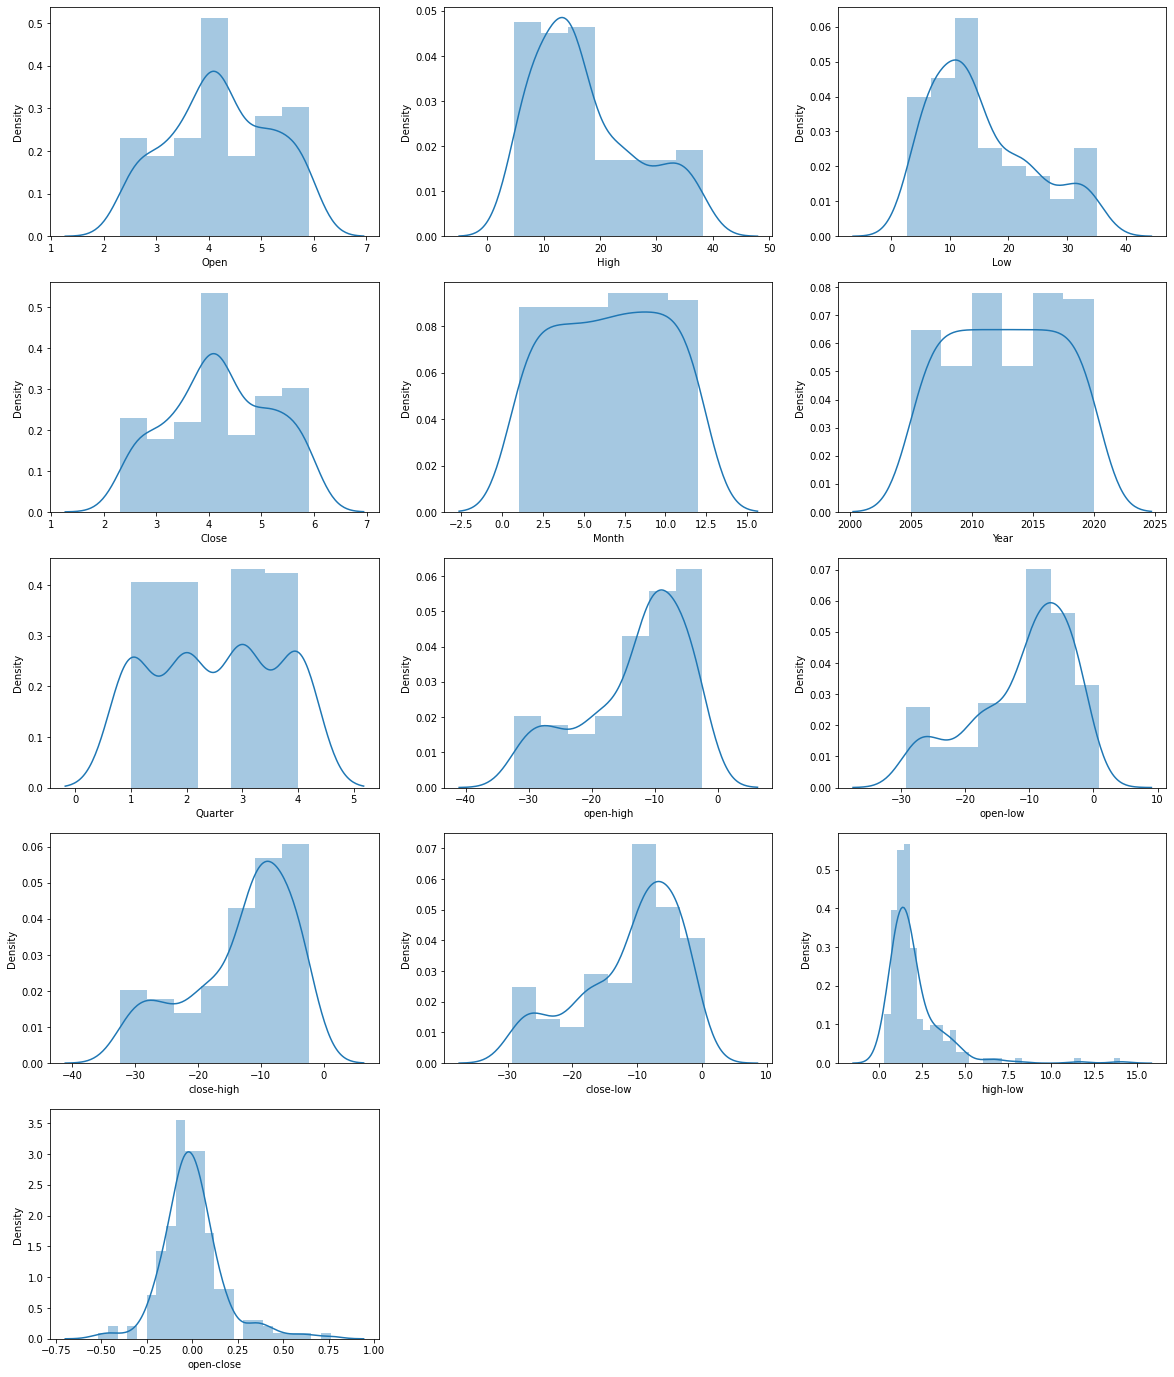

In [39]:
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in t[:]:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(t[feature])
  plt.xlabel(feature)
  plotnumber+=1

plt.show()

From above we may conclude most data has **normal distribution** among various colums.

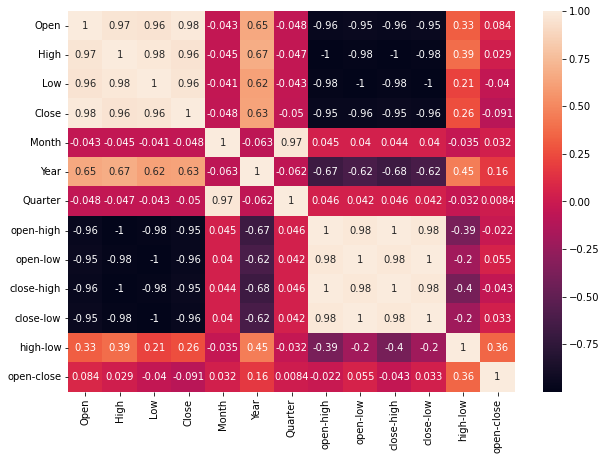

In [40]:
#Plotting a correlation plot
plt.figure(figsize=(10,7))
sns.heatmap(t.corr(),annot=True)

In [41]:
#Keeping only columns that are not correlated
t=t[['Month','Year','high-low','open-close','Close']]

In [42]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       185 non-null    int64  
 1   Year        185 non-null    int64  
 2   high-low    185 non-null    float64
 3   open-close  185 non-null    float64
 4   Close       185 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.7 KB


In [43]:
stk_df=stockdf.copy()


#Split the data into train and validation dataset

Here firstly we are separating our **dependent** and **independent** variable.

##We are using Time Series Split to split the data to find out which type gives the best model results.



In [44]:
from sklearn.model_selection import TimeSeriesSplit

In [45]:
t1.head(2)

,Open,High,Low,Close,Month,Year,Quarter
0,13.00,14.00,11.25,12.46,7,2005,3
1,12.58,14.88,12.55,13.42,8,2005,3


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t1 = pd.DataFrame(scaler.fit_transform(t1), columns = t1.columns,index=t1.index)
t1.head()

,Open,High,Low,Close,Month,Year,Quarter
0,0.008334,0.007027,0.016767,0.006929,0.545455,0.0,0.666667
1,0.007168,0.009268,0.020591,0.009611,0.636364,0.0,0.666667
2,0.009668,0.009242,0.019768,0.009276,0.727273,0.0,0.666667
3,0.008890,0.008224,0.020150,0.008410,0.818182,0.0,1.000000
4,0.009307,0.006722,0.021562,0.009583,0.909091,0.0,1.000000


In [47]:
#Independent features
x = t1.drop(['Close', 'Open', 'High', 'Low'], axis=1)

In [48]:
x = np.random.permutation(x)

In [49]:
#Dependent Feature
y=t1['Close']

Fitting Time series 

In [50]:
tscv = TimeSeriesSplit()

In [51]:
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


**Splitting train test with timeseries split**

In [52]:
for train_index, test_index in tscv.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] TEST: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] TEST: [65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94] TEST: [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11

In [53]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)
x_train.head()

,0,1,2
0,0.727273,0.733333,0.666667
1,0.636364,0.933333,0.666667
2,0.727273,0.533333,0.666667
3,0.818182,1.000000,1.000000
4,0.727273,0.600000,0.666667


In [54]:
#checking the shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((155, 3), (30, 3), (155, 1), (30, 1))

#Creating a function for fitting the model evaluating the metrics




In [55]:
def train_model(model,x_train,y_train,x_test,y_test):
  
  model.fit(x_train,y_train)
  pred_value=model.predict(x_test)
  MSE=mean_squared_error(y_test,pred_value)
  RMSE=np.sqrt(MSE)
  r2=r2_score(y_test,pred_value)
  adj_r2=1-(1-r2_score(y_test,pred_value))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print(f'Evaluation matrix-- \n MSE: {MSE}\n RMSE: {RMSE}\n r2Score: {r2}\n adj_r2: {adj_r2}\n')
  print('Evaluation Graph')
  plt.figure(figsize=(10,5))
  p1=plt.plot(pred_value[:100])
  p2=plt.plot(np.array(y_test[:100]))
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 10})
  plt.show()

 

#Linear Regression

Evaluation matrix-- 
 MSE: 0.0969046404001966
 RMSE: 0.31129510179281106
 r2Score: -0.07360503378529493
 adj_r2: -0.19748253768359825

Evaluation Graph


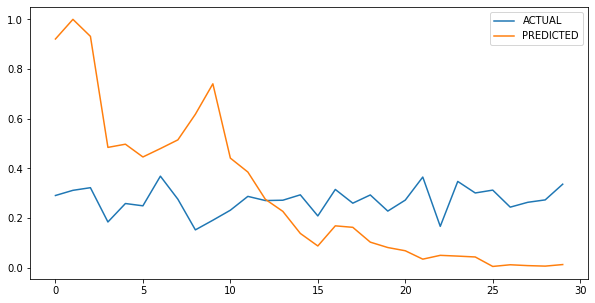

In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

train_model(reg,x_train,y_train,x_test,y_test)

##Linear Regression is not doing good so we will try Random forest

#Random Forest

Evaluation matrix-- 
 MSE: 0.0886513583113218
 RMSE: 0.2977437796349771
 r2Score: 0.017832952664815438
 adj_r2: -0.09549401433539817

Evaluation Graph


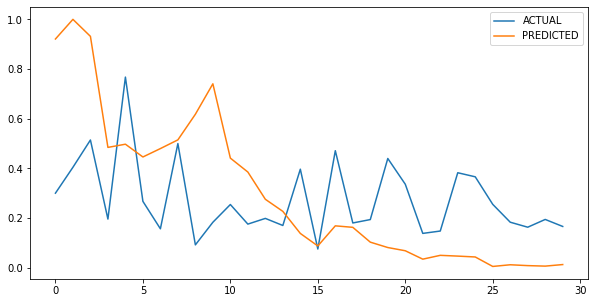

RandomForestRegressor(max_depth=20, max_leaf_nodes=40, n_estimators=60)

In [57]:
rf_model = RandomForestRegressor()
#Defining the hypertuning parameters
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


train_model(rf_grid,x_train,y_train,x_test,y_test)
rf_grid.best_estimator_

##Even Random Forest has failed when we used the time series split hence we wil go for next type of split.

##**Split using train test split**

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t2=pd.DataFrame(scaler.fit_transform(t), columns=t.columns,index=t.index)
t2.head()

,Month,Year,high-low,open-close,Close
Date,,,,,
2005-07-01,0.545455,0.0,0.036430,0.437543,0.061527
2005-08-01,0.636364,0.0,0.025872,0.353841,0.082103
2005-09-01,0.727273,0.0,0.031456,0.414885,0.079613
2005-10-01,0.818182,0.0,0.021184,0.416913,0.073075
2005-11-01,0.909091,0.0,0.000000,0.400869,0.081896


In [59]:
X = t2.drop('Close',axis=1)
Y=t2['Close']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state =0)

In [61]:
X_train.head(2)

,Month,Year,high-low,open-close
Date,,,,
2014-12-01,1.000000,0.600000,0.107085,0.338503
2006-03-01,0.181818,0.066667,0.063597,0.236511


#Linear Regression

Evaluation matrix-- 
 MSE: 0.03362028565316659
 RMSE: 0.1833583531044239
 r2Score: 0.5570593317493646
 adj_r2: 0.5016917482180352

Evaluation Graph


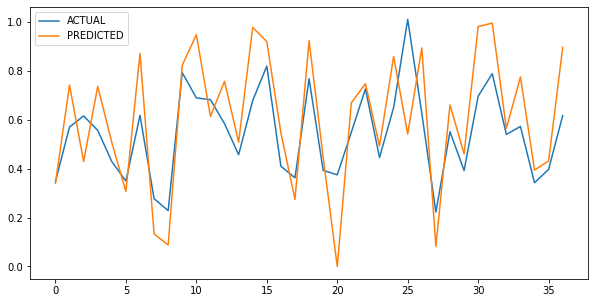

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

train_model(reg,X_train,Y_train,X_test,Y_test)

##Linear Regression is giving a r2 score of 53 which is better that the previous type of timeseries split models.
##So we will further use Regularization models.

#Ridge Method

Evaluation matrix-- 
 MSE: 0.03444493232428609
 RMSE: 0.18559345981010777
 r2Score: 0.5461947736267918
 adj_r2: 0.4894691203301408

Evaluation Graph


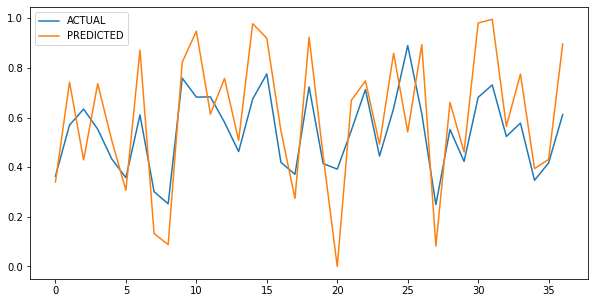

In [63]:
rid=Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(rid, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(ridge_regressor,X_train,Y_train,X_test,Y_test)

#Lasso

Evaluation matrix-- 
 MSE: 0.04078344052329692
 RMSE: 0.2019491037942405
 r2Score: 0.46268617151836355
 adj_r2: 0.395521942958159

Evaluation Graph


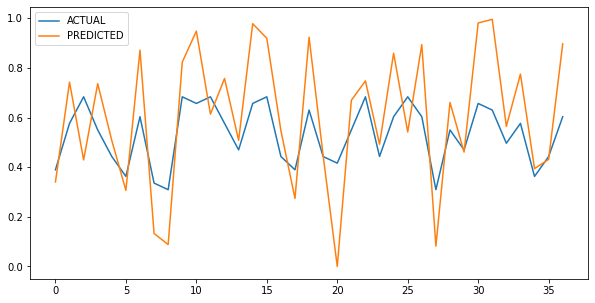

In [64]:
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(lasso_regressor,X_train,Y_train,X_test,Y_test)

#Elastic Net

Evaluation matrix-- 
 MSE: 0.03617764661283466
 RMSE: 0.19020422343584975
 r2Score: 0.5233666027785515
 adj_r2: 0.4637874281258705

Evaluation Graph


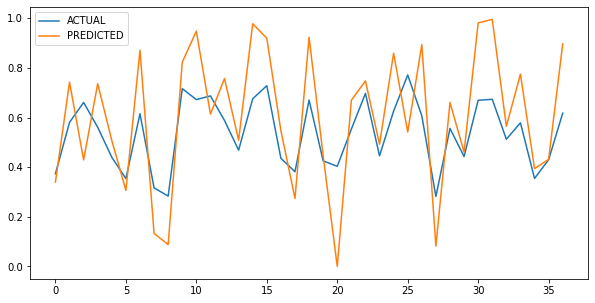

In [65]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
train_model(elastic_regressor,X_train,Y_train,X_test,Y_test)

#Random Forest

Evaluation matrix-- 
 MSE: 0.007549900680185809
 RMSE: 0.0868901644617261
 r2Score: 0.9005315395887348
 adj_r2: 0.8880979820373266

Evaluation Graph


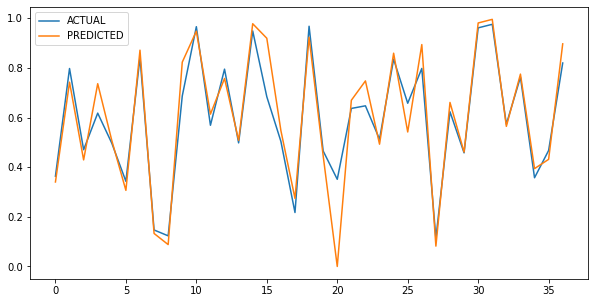

In [66]:
rf_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
train_model(rf_grid,X_train,Y_train,X_test,Y_test)

#Gradient Boost

Evaluation matrix-- 
 MSE: 0.0070679076564347555
 RMSE: 0.08407084902886824
 r2Score: 0.9068817031249666
 adj_r2: 0.8952419160155874

Evaluation Graph


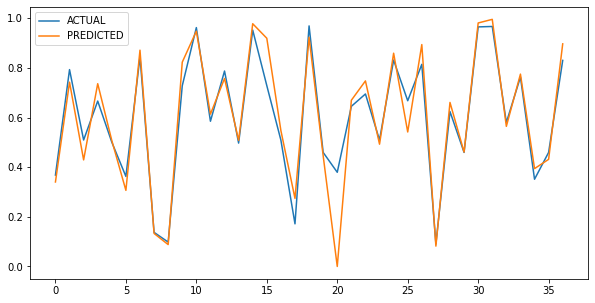

In [67]:
gb_model = RandomForestRegressor()
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0,cv=3)
train_model(gb_grid,X_train,Y_train,X_test,Y_test)

#XG Boost

Evaluation matrix-- 
 MSE: 0.007046838064196775
 RMSE: 0.0839454469533445
 r2Score: 0.9071592908695187
 adj_r2: 0.8955542022282086

Evaluation Graph


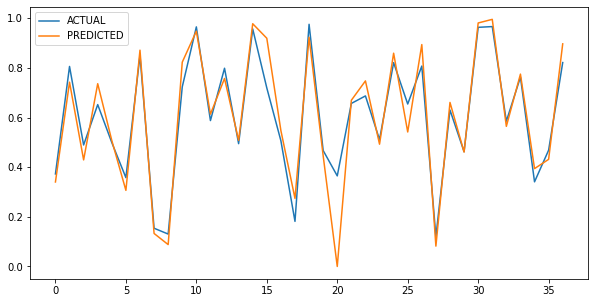

In [68]:
xg=XGBRegressor()
xg_grid=GridSearchCV(gb_model,param_grid=params,verbose=0,cv=3)
train_model(xg_grid,X_train,Y_train,X_test,Y_test)

#K Nearest Neighbours

Evaluation matrix-- 
 MSE: 0.01629087060468155
 RMSE: 0.1276356948689572
 r2Score: 0.7853709755335575
 adj_r2: 0.7585423474752522

Evaluation Graph


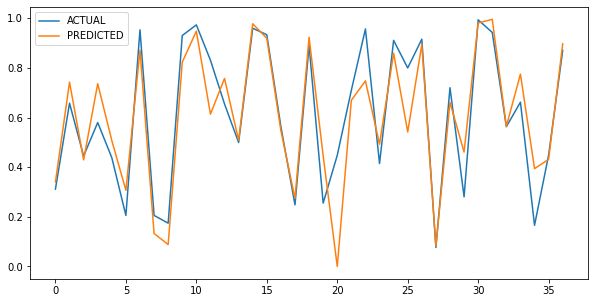

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
nn={ 'n_neighbors': [1, 2, 3], 'p': [1, 2, 3] }
knn_grid= GridSearchCV(knn,param_grid=nn,verbose=0,cv=3)
train_model(knn_grid,X_train,Y_train,X_test,Y_test)

#Support Vector Regression

Evaluation matrix-- 
 MSE: 0.023691935484492558
 RMSE: 0.15392184862615366
 r2Score: 0.6878633975953841
 adj_r2: 0.6488463222948071

Evaluation Graph


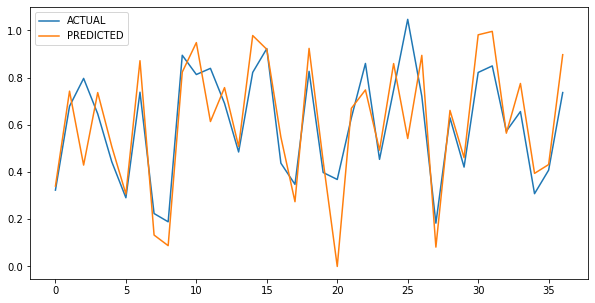

In [70]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear') # using linear kernel
train_model(svm_regressor,X_train,Y_train,X_test,Y_test)

##We can see that Random Forest is performing well over the other models in case of test_train_split.

#Now we will do the further **analysis** of this dataset using **FbProphet** library

In [71]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
stockdf.head(2)

,Close,Year,Month,Quarter
Date,,,,
2005-07-01,12.46,2005,7,3
2005-08-01,13.42,2005,8,3


In [73]:
stockdata = stockdf.drop(['Year', 'Month', 'Quarter'], axis = 1)

In [74]:
#Spliting dataset to test and train
split_date = '2014-01-01'
stock_price_train = stockdata.loc[stockdata.index <= split_date].copy()
stock_price_test = stockdata.loc[stockdata.index > split_date].copy()

In [75]:
stock_price_train.shape

(103, 1)

In [76]:
stock_price_test.shape

(82, 1)

In [77]:
# Setup and train model and fit
model = Prophet()
model.fit(stock_price_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'Close':'y'}))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
# Predict on training set with model
stock_price_test_fcst = model.predict(df=stock_price_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))

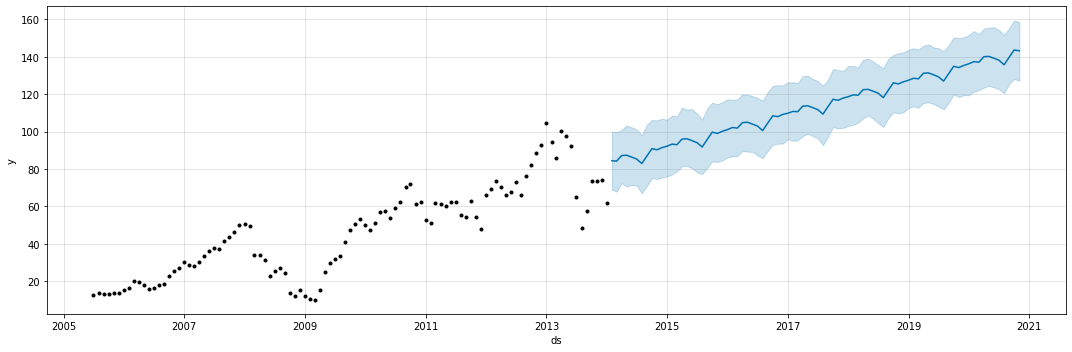

In [79]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(stock_price_test_fcst,
                 ax=ax)
plt.show()

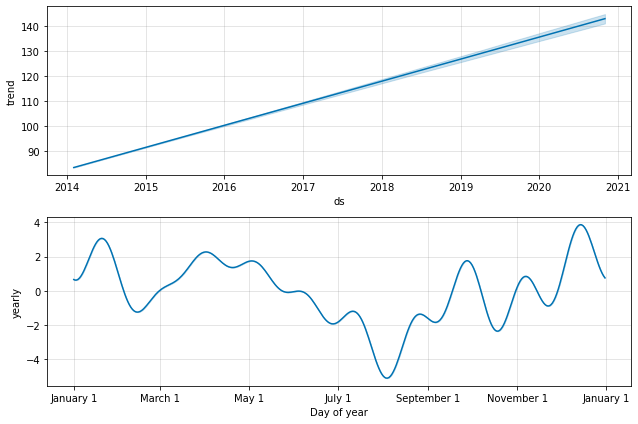

In [80]:
# Plot the components of the model
fig = model.plot_components(stock_price_test_fcst)

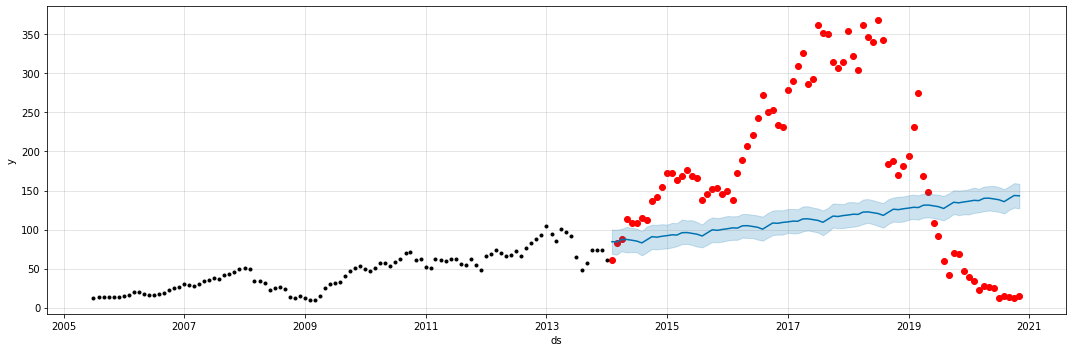

In [81]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(stock_price_test.index, stock_price_test['Close'], color='r')
fig = model.plot(stock_price_test_fcst, ax=ax)

##**Creating multiple lag columns and creating regression model**

In [82]:
data = pd.DataFrame(df.copy())
data.head(2)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42


In [83]:
data['Date']='01-'+data['Date']
data.head(1)

,Date,Open,High,Low,Close
0,01-Jul-05,13.0,14.0,11.25,12.46


In [84]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index(['Date'],inplace = True)
data.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [85]:
stock_data_copy1=stockdata.copy()
stock_data_copy1.rename(columns = {'Close':'y'},inplace=True)
stock_data_copy1.head(2)

,y
Date,
2005-07-01,12.46
2005-08-01,13.42


In [86]:
for i in range(6, 13):
    stock_data_copy1["lag_{}".format(i)] = stock_data_copy1.y.shift(i)

In [87]:
stock_data_copy1 = pd.merge(stock_data_copy1,data[['Open','High','Low']], on='Date', how='outer')
stock_data_copy1.tail(5)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,Open,High,Low
Date,,,,,,,,,,,
2020-07-01,11.95,39.20,46.95,68.30,70.45,41.45,59.50,91.30,25.60,28.30,11.10
2020-08-01,14.37,34.55,39.20,46.95,68.30,70.45,41.45,59.50,12.00,17.16,11.85
2020-09-01,13.15,22.45,34.55,39.20,46.95,68.30,70.45,41.45,14.30,15.34,12.75
2020-10-01,12.42,27.95,22.45,34.55,39.20,46.95,68.30,70.45,13.30,14.01,12.11
2020-11-01,14.67,26.85,27.95,22.45,34.55,39.20,46.95,68.30,12.41,14.90,12.21


In [88]:
y = stock_data_copy1.dropna().y
X = stock_data_copy1.dropna().drop(['y'], axis=1)

In [89]:
split_date = '2014-12-01'
X_train = X.loc[X.index <= split_date].copy()
X_test = X.loc[X.index > split_date].copy()
y_train = y.loc[y.index <= split_date].copy()
y_test = y.loc[y.index > split_date].copy()

##Now let us fit this data to our models and check how they perform

Evaluation matrix-- 
 MSE: 165.96868067576102
 RMSE: 12.882883243892302
 r2Score: 0.9861874544836052
 adj_r2: 0.9838853635642061

Evaluation Graph


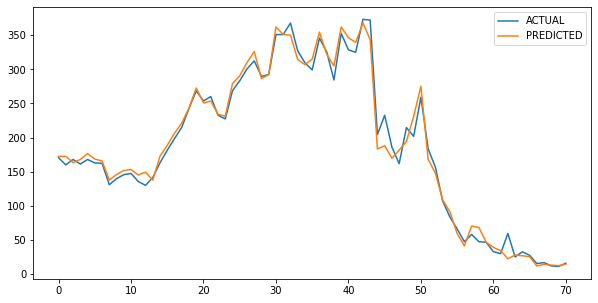

In [90]:
#Linear Reggression
lr = LinearRegression()
train_model(lr,X_train,y_train,X_test,y_test)

##Linear Regression is giving a very good r2 score which means so far it is the best.

In [91]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

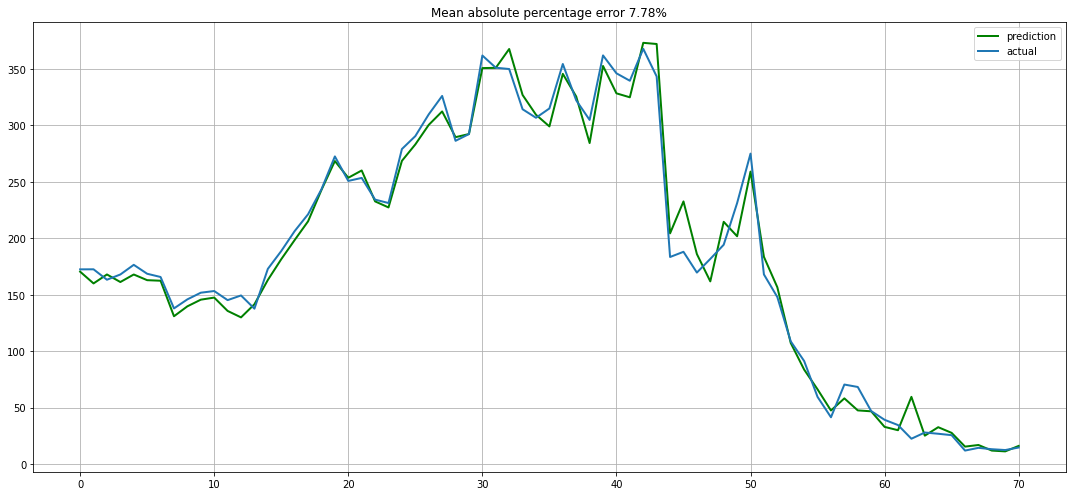

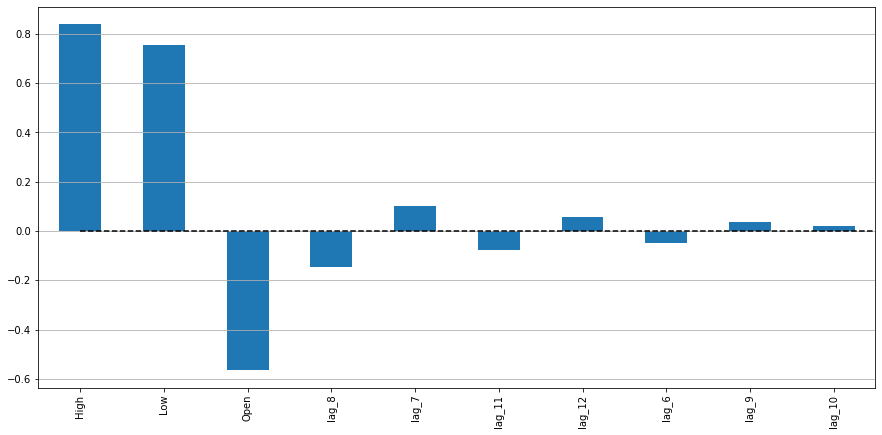

In [92]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

#Regularizing the linear model

##Ridge

Evaluation matrix-- 
 MSE: 167.0377832870594
 RMSE: 12.924309779909308
 r2Score: 0.9860984796937826
 adj_r2: 0.9837815596427464

Evaluation Graph


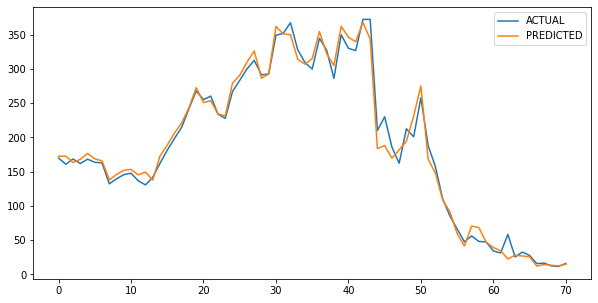

In [93]:
rid=Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(rid, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(ridge_regressor,X_train,y_train,X_test,y_test)

##Lasso Regression

Evaluation matrix-- 
 MSE: 166.06332496288215
 RMSE: 12.886555977563678
 r2Score: 0.9861795778256816
 adj_r2: 0.9838761741299618

Evaluation Graph


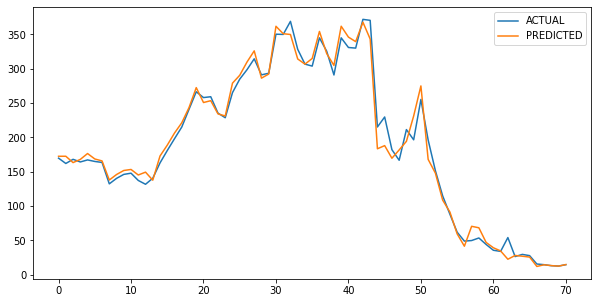

In [94]:
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
train_model(lasso_regressor,X_train,y_train,X_test,y_test)

##BayesianRidge

Evaluation matrix-- 
 MSE: 166.28616134252633
 RMSE: 12.89519915869958
 r2Score: 0.9861610325337384
 adj_r2: 0.9838545379560282

Evaluation Graph


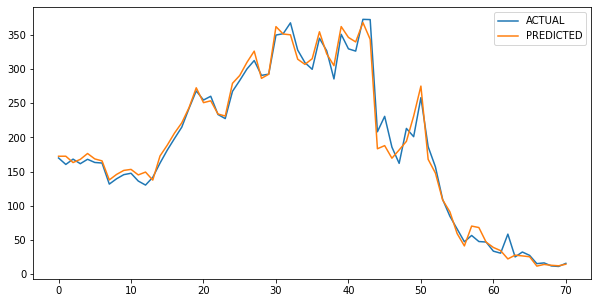

In [95]:
from sklearn.linear_model import BayesianRidge
# Creating and training model
bridge = BayesianRidge()
train_model(bridge,X_train,y_train,X_test,y_test)

Results are **quite** similar to that of linear regression.

#**Random Forest**

Evaluation matrix-- 
 MSE: 11430.708100874846
 RMSE: 106.91448966756025
 r2Score: 0.04869295047053279
 adj_r2: -0.1098582244510451

Evaluation Graph


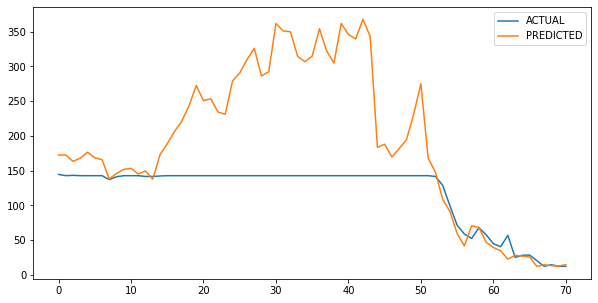

In [96]:
#Importing Random forest regressor and implementing Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
train_model(rf_grid,X_train,y_train,X_test,y_test)

In [97]:
optimal_rf_model=rf_grid.best_estimator_

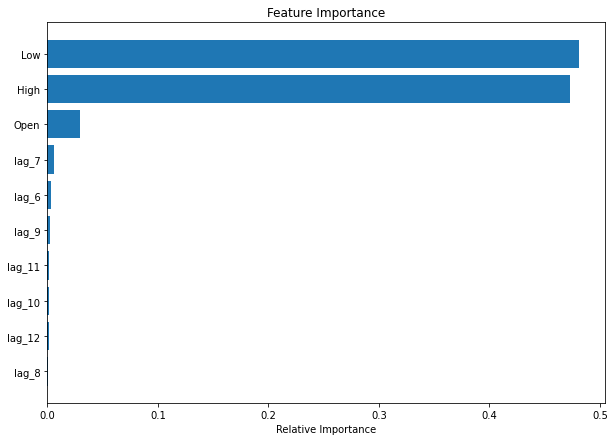

In [98]:
X_imputed_df = pd.DataFrame(X_train, columns = X.columns)
features = X_imputed_df.columns
importances = optimal_rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##From the above analysis we can say that Random forest has failed.



#Time Series Analysis of Yes Bank Stock Prices Using Auto Arima

**We will be loading specific forecasting tools first**

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
                          # for determining ARIMA orders

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

**Installing the pmdarima package in order to use autoarima**

In [100]:
!pip install pmdarima

In [102]:
!pip install statsmodels

In [103]:
from pmdarima import auto_arima

In [104]:
stockdata.head(2)

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42


**Let's visualize the data again**

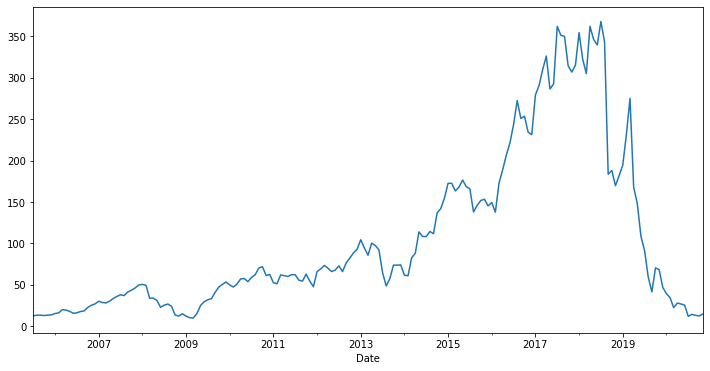

In [105]:
#plotting the data

ax = stockdata['Close'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)

Data is plotted to see if there is a recurring pattern. If no pattern is observed directly, on further decomposing the series, it can be observed that there is a distinct seasonality and trend hidden along with the variations. This explains that **ARIMA** might be a good way for predictions here.

Another thing that should be kept in mind is that up until 2018, the stock prices more or less, kept increasing but there was a sudden dip after that. This can be attributed to the Yes bank fraud case against Rana Kapoor.

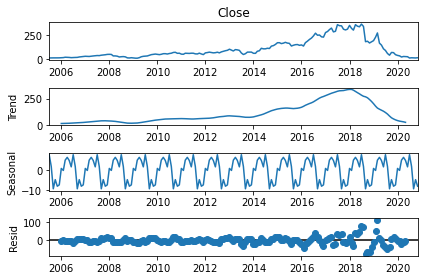

In [106]:
#Time Series Decomposition
result = seasonal_decompose(stockdata['Close'], model = 'add')
result.plot(); 

#Train-Test Split

Now we will divide dataset into train and test for modeling and testing.

In [107]:
len(stockdata)

185

In [108]:
# Set two years for testing
train = stockdata.iloc[:162]
test = stockdata.iloc[162:]

We have last 3 years as testing data and rest for training the model

In [109]:
test.head(2)

,Close
Date,
2019-01-01,194.3
2019-02-01,231.2


**Auto ARIMA** is like a grid search for time series models, it tries ARIMA, SARIMA, SARIMAX, all ARIMA related models depending on the parameters that are supplied to it. The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model.

**Implementing Auto ARIMA Function**


In [110]:
#Applying the Auto ARIMA Function

auto_arima(stockdata['Close'],m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  185
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -812.490
Date:                Mon, 09 May 2022   AIC                           1630.979
Time:                        04:45:28   BIC                           1640.624
Sample:                             0   HQIC                          1634.888
                                - 185                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8165      0.049    -16.784      0.000      -0.912      -0.721
ma.L1          0.9483      0.025     38.149      0.000       0.900       0.997
sigma2       399.9167     17.929     22.305      0.000     364.776     435.058
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              3090.85
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              73.32   Skew:                            -2.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
#statsmodel function implementation
model = SARIMAX(train['Close'],order=(1,1,1))
results = model.fit(maxiter=200)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  162
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -699.260
Date:                Mon, 09 May 2022   AIC                           1404.520
Time:                        04:45:28   BIC                           1413.764
Sample:                    07-01-2005   HQIC                          1408.273
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8875      0.079    -11.189      0.000      -1.043      -0.732
ma.L1          0.9695      0.036     26.646      0.000       0.898       1.041
sigma2       345.8068     15.081     22.930      0.000     316.248     375.365
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5529.42
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):              60.41   Skew:                            -2.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions')

In [113]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Close'][i]}")

predicted=189.0590441, expected=194.3
predicted=182.572358 , expected=231.2
predicted=188.3292115, expected=275.05
predicted=183.2200754, expected=168.0
predicted=187.7543704, expected=147.95
predicted=183.7302398, expected=108.7
predicted=187.3016058, expected=91.3
predicted=184.1320627, expected=59.5
predicted=186.944993 , expected=41.45
predicted=184.4485522, expected=70.45
predicted=186.6641124, expected=68.3
predicted=184.6978302, expected=46.95
predicted=186.4428813, expected=39.2
predicted=184.8941701, expected=34.55
predicted=186.2686321, expected=22.45
predicted=185.0488141, expected=27.95
predicted=186.1313875, expected=26.85
predicted=185.170617 , expected=25.6
predicted=186.0232889, expected=11.95
predicted=185.2665532, expected=14.37
predicted=185.9381467, expected=13.15
predicted=185.3421158, expected=12.42
predicted=185.8710859, expected=14.67


**Visualizing the plot of Actual vs Predicted values**

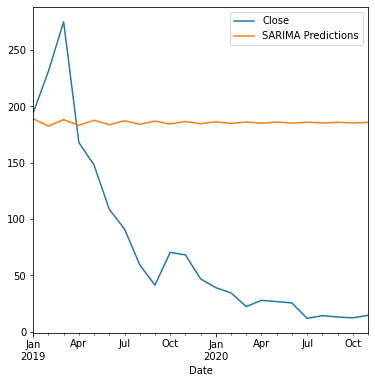

In [114]:
#Plotting Predictions and Original/Expected Values
ax = test['Close'].plot(legend=True,figsize=(6,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

**Calculating Mean Squared Error for SARIMA**

In [115]:
#Calcalutaing MSE
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close'], predictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 17585.44134


**Calculating Root Mean Squared Error for SARIMA**

In [116]:
#Calculating RMSE
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Close'], predictions)
print(f'SARIMA RMSE Error: {error:11.10}')

SARIMA RMSE Error: 132.6101102


**Now we will make Future Predictions of next year**

In [117]:
#Making Future Predictions of next year that is 2021
model = SARIMAX(stockdata['Close'],order=(1,1,1))
results = model.fit(maxiter=200)
fcast = results.predict(len(stockdata),len(stockdata)+11,typ='levels').rename('SARIMA Forecast')

**Plotting Future Predictions with Old values**

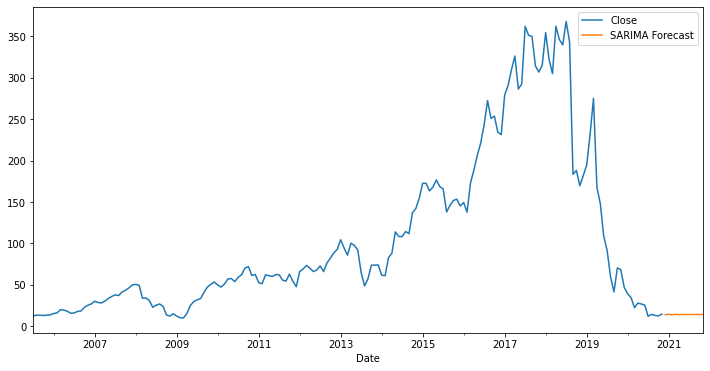

In [118]:
#Plotting Future Predictions with Old values
ax = stockdata['Close'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

#Model Insights
As can be seen through the expected and predicted values, initial few are correct but ARIMA is unable to **predict** the Dip that happened because of the fraud. The **MSE** was extremely high and not acceptable for prediction models. However, This is fair as it is quite unlikely to be able to predict such a huge dip without having any other parameters in the model such as market reputation. With the trend that the model saw, the model obviously followed that trend pattern and showed prices above or around the last highest price that was observed. Seasonality was kept in place, however that cannot really make any model estimate a Dip without additional information.


To check if **Auto ARIMA** works well if the data isnt influenced by Frauds or such sudden dips, data from 2018-2020 was neglected for trial. data for 2017 was then considered to be test and the remaining data before that was considered to be train, the model and the results that were obtained as follows:

**Model for 2017 as Test set**

In [119]:
stock2017 = stockdata.iloc[:150]
train2017 = stockdata.iloc[:138]
test2017 = stockdata.iloc[138:150]

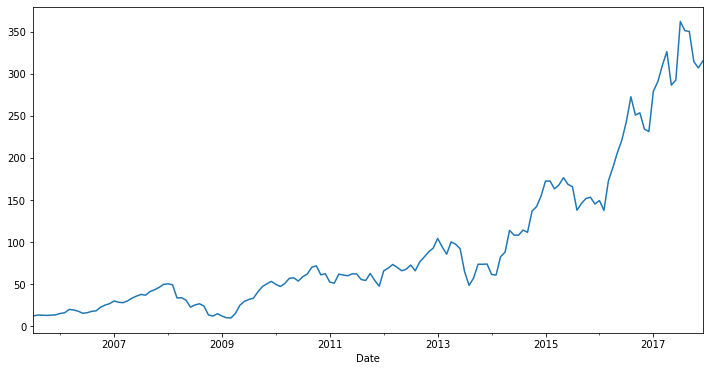

In [120]:
#plotting the data

ax = stock2017['Close'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)

**Applying the Auto ARIMA**

In [121]:
#Applying the Auto ARIMA Function
auto_arima(stock2017['Close'],m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -585.994
Date:                Mon, 09 May 2022   AIC                           1175.988
Time:                        04:45:34   BIC                           1181.996
Sample:                             0   HQIC                          1178.429
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0308      1.079      1.883      0.060      -0.083       4.145
sigma2       152.5996      8.693     17.555      0.000     135.562     169.637
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               367.61
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              20.08   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
#statsmodel function implementation
model2017 = SARIMAX(train2017['Close'],order=(0,1,0))
results2017 = model2017.fit(maxiter=200)
results2017.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  138
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -502.581
Date:                Mon, 09 May 2022   AIC                           1007.162
Time:                        04:45:34   BIC                           1010.082
Sample:                    07-01-2005   HQIC                          1008.348
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        89.9334      7.309     12.304      0.000      75.607     104.260
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):                34.07
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):              13.24   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
# Obtain predicted values
start2017=len(train2017)
end2017=len(train2017)+len(test2017)-1
predictions2017 = results2017.predict(start=start2017, end=end2017, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions 2017')

In [124]:
# Compare predictions to expected values
for i in range(len(predictions2017)):
    print(f"predicted={predictions2017[i]:<11.10}, expected={test2017['Close'][i]}")

predicted=231.26     , expected=279.1
predicted=231.26     , expected=290.56
predicted=231.26     , expected=309.82
predicted=231.26     , expected=326.14
predicted=231.26     , expected=286.38
predicted=231.26     , expected=292.37
predicted=231.26     , expected=361.96
predicted=231.26     , expected=351.15
predicted=231.26     , expected=350.0
predicted=231.26     , expected=314.35
predicted=231.26     , expected=306.8
predicted=231.26     , expected=315.05


**Visualizing plots between Actual and Predicted Values**

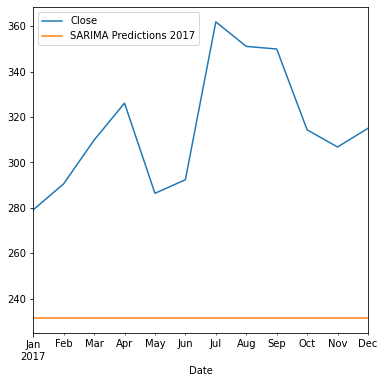

In [125]:
#Plotting Predictions and Original/Expected Values
ax = test2017['Close'].plot(legend=True,figsize=(6,6))
predictions2017.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [126]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test2017['Close'], predictions2017)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 7744.831967


As can be seen by this Model, the 2017 **model predictions are improved** but still very poor. Though **MSE is much better** than the one with all data, it is evident that even with infraudulent data, something is missing.

**Hence we need to check for Stationarity now**

If test statistic is less than critical value in the **Dickey Fuller Test**, series is **stationary**, otherwise it is not In this case, series came out to be non stationary

In [127]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [128]:
#applying adf test on the series
adf_test(stock2017['Close'])

#if test statistic < critical value, series is only stationary then

Results of Dickey-Fuller Test:
Test Statistic                   0.430335
p-value                          0.982595
#Lags Used                       6.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


**Detrending for Improved Model**


In order to solve the problem of stationarity, the method of de-trending is identified as appropriate. 

The concept is basically removing the trend component from the series. Forecasting the trend component separately, seasonality + random component separately and then adding the two together to get the final results.

Text(0.5, 1.0, 'Stock Prices detrended by subtracting the trend component')

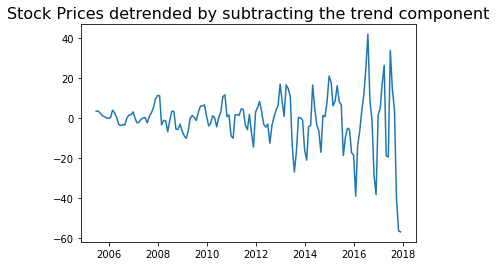

In [129]:
# Using statmodels: Subtracting the Trend Component.
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(stock2017['Close'], extrapolate_trend='freq')
detrended = stock2017.Close.values - res.trend
plt.plot(detrended)
plt.title('Stock Prices detrended by subtracting the trend component', fontsize=16)

In [130]:
detrended =  pd.DataFrame(detrended)

Now checking the **detrended** component in **Dickey Fuller Test**. 



In [131]:
adf_test(detrended.trend)

Results of Dickey-Fuller Test:
Test Statistic                  -5.548965
p-value                          0.000002
#Lags Used                       6.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


**Critical Value > Test Statistic**

Hence, series is **stationary** now. **ARIMA** can now be applied easily.

Data preparation to apply **ARIMA** to the **detrended** portion

In [132]:
len(detrended)

150

In [133]:
# Set one year for testing
train1 = detrended.iloc[:138]
test1 = detrended.iloc[138:150]

In [134]:
test1

,trend
Date,
2017-01-01,1.638333
2017-02-01,4.885417
2017-03-01,16.739583
2017-04-01,26.393750
2017-05-01,-18.922500
2017-06-01,-19.445417
2017-07-01,33.753895
2017-08-01,14.190391
2017-09-01,4.286888


In [135]:
#SARIMA
auto_arima(detrended.trend,m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -552.339
Date:                Mon, 09 May 2022   AIC                           1118.678
Time:                        04:46:35   BIC                           1139.752
Sample:                             0   HQIC                          1127.240
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.079      0.883      0.377      -0.085       0.224
ar.L2         -0.5735      0.079     -7.246      0.000      -0.729      -0.418
ar.L3          0.4321      0.051      8.534      0.000       0.333       0.531
ar.L4         -0.4346      0.103     -4.234      0.000      -0.636      -0.233
ma.L1          0.6965      0.051     13.629      0.000       0.596       0.797
ma.L2          0.9426      0.056     16.706      0.000       0.832       1.053
sigma2        90.6433      6.551     13.836      0.000      77.803     103.484
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               131.29
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              17.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
smodel = SARIMAX(detrended['trend'],order=(4,0,2))
sresults = smodel.fit(maxiter=200)
sresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  150
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -552.339
Date:                Mon, 09 May 2022   AIC                           1118.678
Time:                        04:46:35   BIC                           1139.752
Sample:                    07-01-2005   HQIC                          1127.240
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.079      0.883      0.377      -0.085       0.224
ar.L2         -0.5735      0.079     -7.246      0.000      -0.729      -0.418
ar.L3          0.4321      0.051      8.534      0.000       0.333       0.531
ar.L4         -0.4346      0.103     -4.234      0.000      -0.636      -0.233
ma.L1          0.6965      0.051     13.629      0.000       0.596       0.797
ma.L2          0.9426      0.056     16.706      0.000       0.832       1.053
sigma2        90.6433      6.551     13.836      0.000      77.803     103.484
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               131.29
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              17.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
#Obtaining predicted values
sstart=len(train1)
send=len(train1)+len(test1)-1
spredictions = sresults.predict(start=sstart, end=send, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions Detrended')

In [138]:
# Compare predictions to expected values
for i in range(len(spredictions)):
    print(f"predicted={spredictions[i]:<11.10}, expected={test1['trend'][i]}")

predicted=-16.32393697, expected=1.638333333333378
predicted=8.174462374, expected=4.885416666666629
predicted=10.08840107, expected=16.739583333333314
predicted=17.24922361, expected=26.393749999999955
predicted=6.272421909, expected=-18.922500000000014
predicted=-20.27062788, expected=-19.445416666666688
predicted=-9.544081466, expected=33.75389520202003
predicted=24.78473785, expected=14.190391414141232
predicted=14.88321692, expected=4.286887626262455
predicted=-2.1694968 , expected=-40.11661616161632
predicted=-50.20289424, expected=-56.42011994949513
predicted=-25.32954373, expected=-56.92362373737393


**Visualizing the plots of trend and sarima predictions**

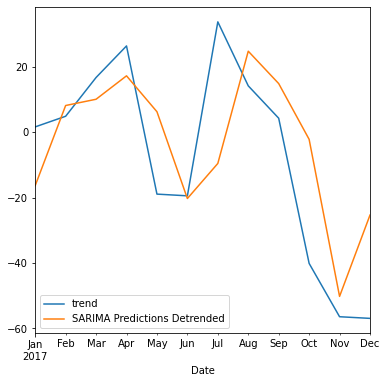

In [139]:
ax = test1['trend'].plot(legend=True,figsize=(6,6))
spredictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [140]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test1['trend'], spredictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 472.7372864


Up until now, the detrended componeent is predicted through the ARIMA model and the **MSE is SIGNIFICANTLY less** for now. This definitely shows that detrending worked.

Now, the subtracted trend component will be predicted separately. For that the trend component that was subtracted is used, converted to a dataframe called TRENDY and ARIMA is applied with seasonality = False

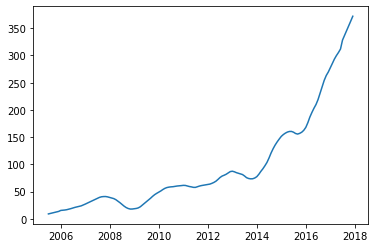

In [141]:
plt.plot(res.trend)

In [142]:
trendy = pd.DataFrame(res.trend)

In [143]:
#SARIMA
auto_arima(trendy.trend,m=12,seasonal = False, maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -256.762
Date:                Mon, 09 May 2022   AIC                            515.523
Time:                        04:46:36   BIC                            518.521
Sample:                             0   HQIC                           516.741
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8811      0.062     30.156      0.000       1.759       2.003
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3150.82
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              20.45   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
# Set one year for testing
train2 = trendy.iloc[:138]
test2 = trendy.iloc[138:150]

In [145]:
model2 = SARIMAX(trendy['trend'],order=(0,2,0))
results2 = model2.fit(maxiter=200)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  150
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -256.762
Date:                Mon, 09 May 2022   AIC                            515.523
Time:                        04:46:36   BIC                            518.521
Sample:                    07-01-2005   HQIC                           516.741
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8811      0.062     30.156      0.000       1.759       2.003
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3150.82
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              20.45   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
# Obtain predicted values
start=len(train2)
end=len(train2)+len(test2)-1
predictionst = results2.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions')

In [147]:
# Compare predictions to expected values
for i in range(len(predictionst)):
    print(f"predicted={predictionst[i]:<11.10}, expected={test2['trend'][i]}")

predicted=275.85625  , expected=277.46166666666664
predicted=285.36125  , expected=285.6745833333334
predicted=293.8875   , expected=293.0804166666667
predicted=300.48625  , expected=299.74625000000003
predicted=306.4120833, expected=305.3025
predicted=310.85875  , expected=311.8154166666667
predicted=318.3283333, expected=328.20610479797995
predicted=344.5967929, expected=336.95960858585875
predicted=345.7131124, expected=345.71311237373754
predicted=354.4666162, expected=354.46661616161634
predicted=363.2201199, expected=363.22011994949514
predicted=371.9736237, expected=371.97362373737394


**Visualizing between trend and SARIMA predictions**

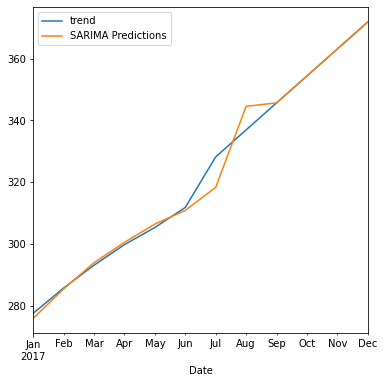

In [148]:
ax = test2['trend'].plot(legend=True,figsize=(6,6))
predictionst.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [149]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test2['trend'], predictionst)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 13.49315534


The Trend is easily predicted with **ARIMA with minimum MSE**.

In [150]:
finalpreds = (predictionst + spredictions)

In [151]:
test2017

,Close
Date,
2017-01-01,279.10
2017-02-01,290.56
2017-03-01,309.82
2017-04-01,326.14
2017-05-01,286.38
2017-06-01,292.37
2017-07-01,361.96
2017-08-01,351.15
2017-09-01,350.00


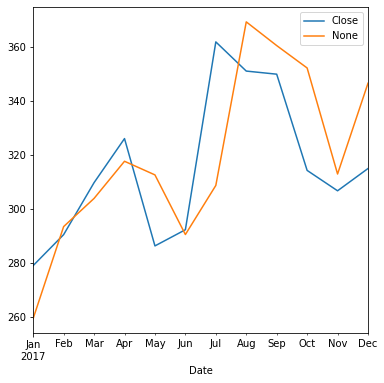

In [152]:
ax = test2017['Close'].plot(legend=True,figsize=(6,6))
finalpreds.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [153]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test2017['Close'], finalpreds)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error:  578.399636


**This model is Much better than the original 2017 model without detrending.**

#**Conclusion**


We have precited the **stock prices** using different methods in this project.We have used simple machine learning linear regression, then have used FBProphet package and implemented linear regression, regularization techniques, bayesean ridge, adaboost, xgboost, random forest and knn techniques. 

We also have used two ways of splitting the data into train and test set one is train test split and other is **timeseriessplit**

Also we have implemented **Time series Analysis using ARIMA and SARIMA** (Checked **stationarity** of the model too).

Out of these we found **Linear regression, regualrization technique, Random Forest and Auto Arima model** working very fine in predicting stock prices for the Yes Bank.
